# STATISTICS

# Confidence Intervals

Libraries:
- pandas
- statsmodels
- numpy

## 1. Confidence intervals for Mean

**Southern and northern cities mortality**

For 61 large cities in England and Wales, the average annual mortality per 100,000 population (according to 1958–1964) and the concentration of calcium in drinking water (in parts per million) are known. The higher the concentration of calcium, the harder the water. Cities are further divided into northern and southern.

In [1]:
import pandas as pd
import math

In [2]:
data = pd.read_csv('water.txt', delimiter="\t")
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


1. 95% confidence interval for average annual mortality in large cities:

In [3]:
mean_mort = data['mortality'].mean()
mean_mort

1524.1475409836066

In [4]:
std_mort = data['mortality'].std()
std_mort

187.6687539314571

Standard deviation of the mean:

$$ se = \frac{std}{\sqrt{n}} $$

In [5]:
se_mort = data['mortality'].std()/math.sqrt(len(data['mortality']))
se_mort

24.028521714278174

In [6]:
from statsmodels.stats.weightstats import _tconfint_generic

In [7]:
conf_mort = _tconfint_generic(mean_mort, se_mort, len(data['mortality']) - 1, 0.05, 'two-sided')
print('95% confidence interval for average mortality: ', conf_mort)

95% confidence interval for average mortality:  (1476.0833413552848, 1572.2117406119285)


2. 95% confidence interval for average annual mortality for all southern cities: 

In [8]:
data_sur = data.loc[(data['location'] == 'South')]
data_sur.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [9]:
conf_mort_sur = _tconfint_generic(data_sur['mortality'].mean(),
                                  data_sur['mortality'].std()/math.sqrt(len(data_sur['mortality'])),
                                  len(data_sur['mortality']) - 1, 0.05, 'two-sided')

print('95% confidence interval for average mortality in south: ', conf_mort_sur)

95% confidence interval for average mortality in south:  (1320.1517462936238, 1433.463638321761)


3. 95% confidence interval for average annual mortality for all northern cities:

In [10]:
data_nord = data.loc[(data['location'] == 'North')]
data_nord.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [11]:
conf_mort_nord = _tconfint_generic(data_nord['mortality'].mean(), 
                                   data_nord['mortality'].std()/math.sqrt(len(data_nord['mortality'])),
                                  len(data_nord['mortality']) - 1, 0.05, 'two-sided')

print('95% confidence interval for average mortality in north: ', conf_mort_nord)

95% confidence interval for average mortality in north:  (1586.5605251961385, 1680.6394748038613)


As we can see this interval does not overlap with the previous.

## 2. Confidence intervals for proportion

**Gene variant** 

Most mammals are unable to digest the lactose contained in milk in adulthood. In humans, the lactase enzyme encoded by the LCT gene is responsible for the breakdown of lactose. In people with the 13910T variant of this gene, lactase continues to function throughout life. The distribution of this variant of gene varies greatly among different genetic populations.

Of the 50 Mayan population studied, 13910T was detected in one.

1. Normal 95% confidence interval for the proportion of carriers of variant 13910T in the Mayan population:

In [12]:
from statsmodels.stats.proportion import proportion_confint

In [13]:
norm_int = proportion_confint(1, 50, method = 'normal')     # alpha=0.05 by default

In [14]:
print(' 95% Normal interval: ', norm_int)

 95% Normal interval:  (0.0, 0.05880530708179099)


2. Wilson 95% confidence interval for the proportion of carriers of variant 13910T in the Mayan population:

In [15]:
wils_int = proportion_confint(1, 50, method = 'wilson') 

In [16]:
print('Wilson interval: ', wils_int)

Wilson interval:  (0.003539259271646236, 0.10495443589637815)


3. Let the Mayan population really have 2% of carriers of the 13910T variant, as in the sample that we investigated. Then, what sample size is needed to use the normal interval to estimate the proportion of carriers of the 13910T gene with an accuracy of ± 0.01, for example, at a confidence level of 95%?

In [17]:
from statsmodels.stats.proportion import samplesize_confint_proportion
import numpy as np

In [18]:
#for interval lenghh = 0.02 (0.02 ± 0.01 of population), N samples= ?

n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.02/2, alpha=0.05)))
# 0.02 proportion
# 0.02/2 desired half length of the confidence interval

print('Number of samples: ', n_samples)

Number of samples:  753


Let's build a graph of the dependence of the sample size necessary for estimation for the fraction of carriers _p_ of the 13910T gene with an accuracy of ± 0.01 at a confidence level of 95% on the unknown parameter _p._

In [19]:
p_n = np.arange(0, 1.05, 0.05)    # proportion of carriers of gene variant
samples = np.zeros(p_n.shape[0])

i = 0
for p in p_n:
    samples[i] = int(np.ceil(samplesize_confint_proportion(p, 0.02/2)))
    i = i+1

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'N samples')

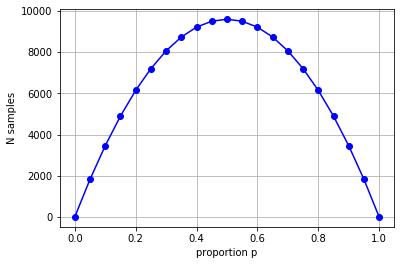

In [20]:
%pylab inline
pylab.grid(True)
pylab.plot(p_n, samples, 'b-', marker='o')
xlabel('proportion p')
ylabel('N samples')

In [21]:
samples.max()

9604.0

In [22]:
p_n[samples.argmax()]

0.5

As we can see, for worse case, if proprotion would is 0.5, more samples size needed. 